<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Proximal%20Policy%20Optimization%20(PPO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proximal Policy Optimization (PPO)
---
In this notebook, you will implement a PPO agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00


In [2]:
!pip install stable_baselines3 gymnasium gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [4]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.3.1+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#env = gymnasium.make("LunarLander-v2", continuous=True)
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

#env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
env_val = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=1000, render=False)

# Initialize PPO
model = PPO('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=100000,  progress_bar=True, callback=eval_callback)

# Save the model
model.save("ppo_lunar_lander_continous")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Eval num_timesteps=1000, episode_reward=-229.31 +/- 135.75

Episode length: 116.00 +/- 37.45

New best mean reward!

Eval num_timesteps=2000, episode_reward=-142.23 +/- 123.96

Episode length: 127.20 +/- 42.00

New best mean reward!

Eval num_timesteps=3000, episode_reward=-134.41 +/- 43.44

Episode length: 78.20 +/- 6.21

New best mean reward!

Eval num_timesteps=4000, episode_reward=-104.15 +/- 66.99

Episode length: 70.40 +/- 17.01

New best mean reward!

Eval num_timesteps=5000, episode_reward=-119.33 +/- 21.88

Episode length: 78.60 +/- 10.76

Eval num_timesteps=6000, episode_reward=-92.96 +/- 30.35

Episode length: 77.40 +/- 8.36

New best mean reward!

Eval num_timesteps=7000, episode_reward=-194.50 +/- 81.01

Episode length: 82.60 +/- 15.76

Eval num_timesteps=8000, episode_reward=-105.82 +/- 96.68

Episode length: 78.60 +/- 18.01

Eval num_timesteps=9000, episode_reward=-244.65 +/- 54.49

Episode length: 113.20 +/- 14.03

Eval num_timesteps=10000, episode_reward=-187.48 +/- 73.38

Episode length: 117.80 +/- 21.77

Eval num_timesteps=11000, episode_reward=-212.48 +/- 92.26

Episode length: 117.80 +/- 40.09

Eval num_timesteps=12000, episode_reward=-150.79 +/- 109.45

Episode length: 143.80 +/- 45.39

Eval num_timesteps=13000, episode_reward=-213.14 +/- 119.41

Episode length: 99.80 +/- 16.92

Eval num_timesteps=14000, episode_reward=-212.56 +/- 74.32

Episode length: 131.60 +/- 53.27

Eval num_timesteps=15000, episode_reward=-194.24 +/- 79.14

Episode length: 148.00 +/- 25.33

Eval num_timesteps=16000, episode_reward=-221.83 +/- 35.62

Episode length: 154.80 +/- 70.44

Eval num_timesteps=17000, episode_reward=-333.66 +/- 97.89

Episode length: 197.20 +/- 51.18

Eval num_timesteps=18000, episode_reward=-274.19 +/- 162.64

Episode length: 164.80 +/- 60.85

Eval num_timesteps=19000, episode_reward=-294.86 +/- 105.94

Episode length: 170.40 +/- 85.26

Eval num_timesteps=20000, episode_reward=-289.79 +/- 136.75

Episode length: 266.40 +/- 147.09

Eval num_timesteps=21000, episode_reward=-332.86 +/- 105.22

Episode length: 154.60 +/- 57.77

Eval num_timesteps=22000, episode_reward=-315.63 +/- 66.22

Episode length: 128.40 +/- 38.51

Eval num_timesteps=23000, episode_reward=-376.84 +/- 76.55

Episode length: 127.00 +/- 13.67

Eval num_timesteps=24000, episode_reward=-303.48 +/- 39.60

Episode length: 219.20 +/- 145.53

Eval num_timesteps=25000, episode_reward=-339.28 +/- 46.72

Episode length: 116.20 +/- 15.97

Eval num_timesteps=26000, episode_reward=-214.76 +/- 71.31

Episode length: 99.20 +/- 7.30

Eval num_timesteps=27000, episode_reward=-206.69 +/- 188.43

Episode length: 244.00 +/- 200.40

Eval num_timesteps=28000, episode_reward=-244.03 +/- 57.79

Episode length: 133.40 +/- 45.62

Eval num_timesteps=29000, episode_reward=-194.81 +/- 99.94

Episode length: 141.00 +/- 26.21

Eval num_timesteps=30000, episode_reward=-277.66 +/- 25.43

Episode length: 141.20 +/- 34.10

Eval num_timesteps=31000, episode_reward=-249.80 +/- 70.43

Episode length: 132.80 +/- 45.94

Eval num_timesteps=32000, episode_reward=-192.33 +/- 61.15

Episode length: 164.60 +/- 58.92

Eval num_timesteps=33000, episode_reward=-82.21 +/- 110.83

Episode length: 168.00 +/- 58.01

New best mean reward!

Eval num_timesteps=34000, episode_reward=-183.17 +/- 57.34

Episode length: 154.40 +/- 44.06

Eval num_timesteps=35000, episode_reward=-225.09 +/- 44.67

Episode length: 150.40 +/- 75.93

Eval num_timesteps=36000, episode_reward=-174.55 +/- 34.74

Episode length: 146.80 +/- 31.05

Eval num_timesteps=37000, episode_reward=-198.36 +/- 77.17

Episode length: 209.20 +/- 154.14

Eval num_timesteps=38000, episode_reward=-214.90 +/- 42.45

Episode length: 152.00 +/- 50.70

Eval num_timesteps=39000, episode_reward=-202.51 +/- 58.86

Episode length: 191.20 +/- 47.79

Eval num_timesteps=40000, episode_reward=-186.78 +/- 57.37

Episode length: 135.60 +/- 44.11

Eval num_timesteps=41000, episode_reward=-161.22 +/- 32.10

Episode length: 165.20 +/- 74.59

Eval num_timesteps=42000, episode_reward=-192.00 +/- 34.93

Episode length: 159.60 +/- 34.38

Eval num_timesteps=43000, episode_reward=-220.35 +/- 29.77

Episode length: 180.80 +/- 108.56

Eval num_timesteps=44000, episode_reward=-197.34 +/- 57.29

Episode length: 136.40 +/- 29.53

Eval num_timesteps=45000, episode_reward=-259.30 +/- 20.13

Episode length: 131.40 +/- 29.94

Eval num_timesteps=46000, episode_reward=-177.32 +/- 49.60

Episode length: 230.80 +/- 96.50

Eval num_timesteps=47000, episode_reward=-198.66 +/- 42.50

Episode length: 151.40 +/- 33.96

Eval num_timesteps=48000, episode_reward=-101.43 +/- 49.74

Episode length: 347.60 +/- 327.32

Eval num_timesteps=49000, episode_reward=-151.38 +/- 62.84

Episode length: 267.60 +/- 144.43

Eval num_timesteps=50000, episode_reward=-127.61 +/- 120.39

Episode length: 490.00 +/- 141.61

Eval num_timesteps=51000, episode_reward=-64.67 +/- 131.45

Episode length: 395.60 +/- 166.76

New best mean reward!

Eval num_timesteps=52000, episode_reward=-204.63 +/- 18.45

Episode length: 295.80 +/- 197.38

Eval num_timesteps=53000, episode_reward=-41.90 +/- 173.08

Episode length: 377.00 +/- 129.94

New best mean reward!

Eval num_timesteps=54000, episode_reward=-187.91 +/- 38.01

Episode length: 442.00 +/- 296.22

Eval num_timesteps=55000, episode_reward=-80.74 +/- 205.82

Episode length: 542.00 +/- 246.53

Eval num_timesteps=56000, episode_reward=-234.26 +/- 44.55

Episode length: 395.40 +/- 328.72

Eval num_timesteps=57000, episode_reward=-211.13 +/- 81.36

Episode length: 442.20 +/- 320.65

Eval num_timesteps=58000, episode_reward=-259.08 +/- 22.30

Episode length: 294.80 +/- 132.53

Eval num_timesteps=59000, episode_reward=-261.92 +/- 32.31

Episode length: 279.80 +/- 51.69

Eval num_timesteps=60000, episode_reward=-225.97 +/- 14.63

Episode length: 437.20 +/- 136.50

Eval num_timesteps=61000, episode_reward=-241.15 +/- 21.16

Episode length: 309.00 +/- 91.51

Eval num_timesteps=62000, episode_reward=-292.56 +/- 47.89

Episode length: 579.40 +/- 262.48

Eval num_timesteps=63000, episode_reward=-253.73 +/- 55.54

Episode length: 532.40 +/- 251.45

Eval num_timesteps=64000, episode_reward=-209.34 +/- 45.80

Episode length: 847.20 +/- 128.71

Eval num_timesteps=65000, episode_reward=-127.20 +/- 53.96

Episode length: 726.40 +/- 338.70

Eval num_timesteps=66000, episode_reward=-57.13 +/- 19.94

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=67000, episode_reward=-60.12 +/- 32.00

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=68000, episode_reward=-42.18 +/- 19.83

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=69000, episode_reward=-49.68 +/- 25.98

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=70000, episode_reward=-55.94 +/- 16.33

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=71000, episode_reward=-40.40 +/- 18.05

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=72000, episode_reward=-1.74 +/- 64.33

Episode length: 997.60 +/- 4.80

New best mean reward!

Eval num_timesteps=73000, episode_reward=-29.24 +/- 29.04

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=74000, episode_reward=42.30 +/- 93.46

Episode length: 874.60 +/- 83.62

New best mean reward!

Eval num_timesteps=75000, episode_reward=21.65 +/- 56.33

Episode length: 989.20 +/- 21.60

Eval num_timesteps=76000, episode_reward=14.97 +/- 58.89

Episode length: 999.60 +/- 0.80

Eval num_timesteps=77000, episode_reward=15.66 +/- 67.06

Episode length: 991.60 +/- 16.80

Eval num_timesteps=78000, episode_reward=39.30 +/- 49.12

Episode length: 990.20 +/- 15.90

Eval num_timesteps=79000, episode_reward=51.49 +/- 57.13

Episode length: 966.00 +/- 44.05

New best mean reward!

Eval num_timesteps=80000, episode_reward=35.90 +/- 72.42

Episode length: 968.20 +/- 28.61

Eval num_timesteps=81000, episode_reward=41.71 +/- 48.43

Episode length: 947.60 +/- 67.10

Eval num_timesteps=82000, episode_reward=108.84 +/- 95.69

Episode length: 884.20 +/- 64.47

New best mean reward!

Eval num_timesteps=83000, episode_reward=53.06 +/- 83.63

Episode length: 922.20 +/- 95.56

Eval num_timesteps=84000, episode_reward=4.58 +/- 51.04

Episode length: 981.20 +/- 37.60

Eval num_timesteps=85000, episode_reward=-16.77 +/- 30.27

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=86000, episode_reward=-31.97 +/- 35.06

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=87000, episode_reward=73.18 +/- 140.22

Episode length: 867.60 +/- 80.97

Eval num_timesteps=88000, episode_reward=129.29 +/- 17.26

Episode length: 814.00 +/- 53.27

New best mean reward!

Eval num_timesteps=89000, episode_reward=10.65 +/- 78.03

Episode length: 936.00 +/- 68.74

Eval num_timesteps=90000, episode_reward=30.78 +/- 94.60

Episode length: 836.80 +/- 140.56

Eval num_timesteps=91000, episode_reward=181.81 +/- 21.82

Episode length: 792.80 +/- 35.63

New best mean reward!

Eval num_timesteps=92000, episode_reward=183.31 +/- 11.82

Episode length: 796.20 +/- 15.77

New best mean reward!

Eval num_timesteps=93000, episode_reward=115.66 +/- 73.68

Episode length: 782.40 +/- 109.65

Eval num_timesteps=94000, episode_reward=118.32 +/- 41.08

Episode length: 793.60 +/- 104.67

Eval num_timesteps=95000, episode_reward=62.13 +/- 105.35

Episode length: 679.60 +/- 109.20

Eval num_timesteps=96000, episode_reward=73.00 +/- 119.86

Episode length: 652.20 +/- 41.12

Eval num_timesteps=97000, episode_reward=131.13 +/- 111.57

Episode length: 668.60 +/- 131.80

Eval num_timesteps=98000, episode_reward=159.67 +/- 23.63

Episode length: 692.00 +/- 54.62

Eval num_timesteps=99000, episode_reward=36.87 +/- 126.07

Episode length: 569.60 +/- 66.96

Eval num_timesteps=100000, episode_reward=128.80 +/- 29.99

Episode length: 722.40 +/- 109.86

Mean reward: 66.52 +/- 110.60


In [6]:
# #env = gymnasium.make("LunarLander-v2", continuous=True)
# env = make_vec_env("LunarLander-v2", n_envs=1)

# #env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
# env_val = make_vec_env("LunarLander-v2", n_envs=1)

# eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=500, render=False,  deterministic=True)

# # Initialize PPO
# model = PPO('MlpPolicy', env, verbose=0)

# # Train the model
# model.learn(total_timesteps=20000,  progress_bar=True, callback=eval_callback)

# # Save the model
# model.save("pp_lunar_lander")

# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
# print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# env.close()
# env_val.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Load the best model
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1, seed=0)
best_model_path = "./logs/best_model.zip"
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing CarRacing
env = VecVideoRecorder(env, "./videos/", video_length=5000, record_video_trigger=lambda x: x == 0, name_prefix="best_model_lunar_lander_ppo")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
      break

env.close()

Best Model - Mean reward: 150.88 +/- 66.06
Moviepy - Building video /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


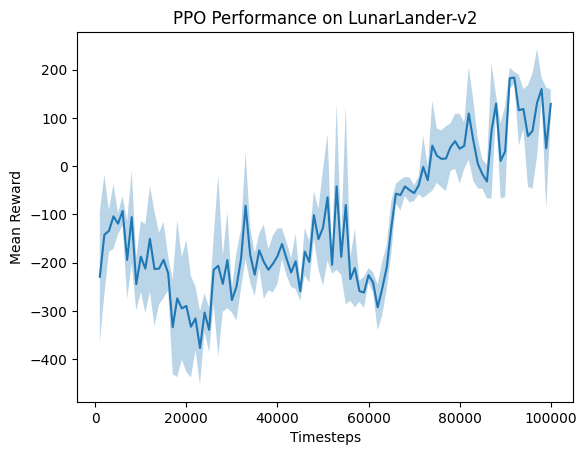

In [8]:
# Load the evaluations.npz file
data = numpy.load('./logs/evaluations.npz')

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps, mean_results - std_results, mean_results + std_results, alpha=0.3)
matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title('PPO Performance on LunarLander-v2')
matplotlib.pyplot.show()